### A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#dataset:Company_Data.csv
#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
com=pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\randomforest\\Company_Data.csv')

In [3]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
com["Sales_catvar"] = pd.cut(com["Sales"], bins = [0,10,15], labels = ["avr", "gud"])

In [5]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_catvar
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,avr
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,gud
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,gud
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,avr
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,avr


In [6]:
com=pd.get_dummies(com, columns=['Sales_catvar','ShelveLoc','Urban','US'], drop_first=True)

In [7]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_catvar_gud,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0


In [8]:
com.shape

(400, 13)

In [9]:
com.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Sales_catvar_gud', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_com = norm_func(com.iloc[:,:])
df_com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_catvar_gud,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.460745,0.489541,0.481389,0.228793,0.510701,0.549671,0.514955,0.487500,0.190000,0.212500,0.547500,0.705000,0.645000
std,0.173578,0.156475,0.282687,0.229323,0.295344,0.141776,0.294551,0.327566,0.392792,0.409589,0.498362,0.456614,0.479113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331285,0.387755,0.219697,0.000000,0.258517,0.455090,0.268182,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.460356,0.489796,0.484848,0.172414,0.525050,0.556886,0.536364,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.572833,0.591837,0.707071,0.413793,0.778557,0.640719,0.745455,0.750000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


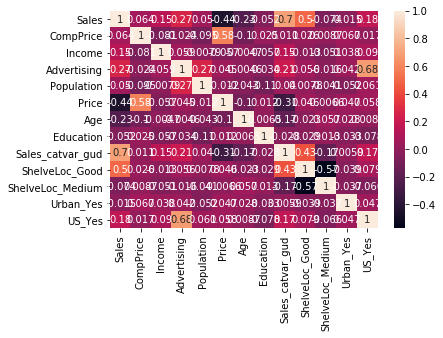

In [13]:
sns.heatmap(com.corr(), annot=True)
plt.show()

In [14]:
X = df_com.drop(['Sales','Sales_catvar_gud'], axis=1)
y = df_com['Sales_catvar_gud']

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
forest = RandomForestClassifier(n_estimators=500)  # n_estimators is the number of decision trees
forest.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
print('Train accuracy: {}'.format(forest.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest.score(Xtest, ytest)))

Train accuracy: 1.0
Test accuracy: 0.8375


### Overfitting and Underfitting¶

In [22]:
forest = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=6)  # n_estimators is the number of decision trees
forest.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(forest.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest.score(Xtest, ytest)))

Train accuracy: 0.9625
Test accuracy: 0.825
